In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## support vector classification

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head()

,outcometype,animaltype,sex,age,year,month,weekday,neutralized,colormix,breedmix,apricot,black,blue,brindle,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,merle,orange,point,red,sable,seal,silver,smoke,tabby,tan,tick,tiger,torbie,tortie,tricolor,white,yellow,affenpinscher,airedale,akita,alaskan,american,anatol,angora,apso,argentino,australian,basenji,basset,bay,beagle,beauceron,belgian,bernard,bernese,bichon,black.1,bloodhound,blue.1,bluetick,bobtail,border,boston,boxer,brittany,bruss,bull,bulldog,bullmastiff,cairn,cane,cardigan,carolina,catahoula,cattle,cavalier,chesa,chihuahua,chinese,chow,coat,coated,cocker,collie,coon,coonhound,corgi,corso,cur,dachshund,dalmatian,dane,doberman,dog,dogo,domestic,dutch,english,eskimo,feist,finnish,flat,fox,french,frise,german,golden,great,greyhound,griffon,hair,harrier,havanese,heeler,highland,himalayan,hound,husky,inu,irish,italian,jack,japanese,kelpie,labrador,lacy,landseer,leonberger,lhasa,longhair,maine,malamute,malinois,maltese,manchester,manx,mastiff,medium,miniature,mountain,mouth,newfoundland,norfolk,norwich,papillon,parson,patterdale,pbgv,pekingese,pembroke,persian,pharaoh,pinsch,pinscher,pit,plott,pointer,pomeranian,poodle,pug,pyrenees,queensland,ragdoll,rat,redbone,retr,retriever,rhod,ridgeback,rottweiler,rough,russell,russian,schipperke,schnauzer,sharpei,sheepdog,shepherd,shetland,shiba,shih,shorthair,siamese,siberian,silky,smooth,snowshoe,soft,span,spaniel,spitz,springer,st,staffordshire,standard,swedish,terr,terrier,tibetan,toy,treeing,tzu,vallhund,vizsla,walker,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adoption,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
#prepare data
X = np.array(data.drop('outcometype',axis=1))
Y = np.array(data.outcometype)

#Y = Y == 'Adoption' #for binary classification of adoption

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.7)

In [6]:
#search for a good model
svc = svm.SVC()

gammas = cs = np.array([0.03, 0.1, 0.3, 1, 3])

lin_dict = {'kernel':['linear'], 'C':cs}
rbf_dict =  {'kernel':['rbf'], 'gamma':gammas, 'C':cs}

clf = model_selection.GridSearchCV(svc, param_grid=[lin_dict, rbf_dict], n_jobs=-1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.626976083628161
{'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.870352,0.541401,1.542188,0.088349,0.03,linear,NaN,"{'C': 0.03, 'kernel': 'linear'}",0.627055,0.615518,0.618691,0.619556,0.622620,0.620688,0.003906,12
1,22.083393,1.541116,1.491421,0.046311,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.625324,0.618114,0.620710,0.624459,0.622043,0.622130,0.002599,7
2,21.102185,0.410331,1.595110,0.114938,0.3,linear,NaN,"{'C': 0.3, 'kernel': 'linear'}",0.629074,0.618691,0.619556,0.624171,0.622908,0.622880,0.003705,5
3,20.766165,0.649874,1.621176,0.071450,1.0,linear,NaN,"{'C': 1.0, 'kernel': 'linear'}",0.628786,0.617537,0.617537,0.622152,0.622620,0.621726,0.004145,8
4,21.933488,1.967397,1.789473,0.190357,3.0,linear,NaN,"{'C': 3.0, 'kernel': 'linear'}",0.626478,0.617248,0.617537,0.621575,0.622620,0.621092,0.003435,11
5,22.042800,0.425844,2.781323,0.113832,0.03,rbf,0.03,"{'C': 0.03, 'gamma': 0.03, 'kernel': 'rbf'}",0.610903,0.597635,0.605134,0.607153,0.608194,0.605804,0.004488,19
6,22.110263,0.403049,2.709360,0.137055,0.03,rbf,0.1,"{'C': 0.03, 'gamma': 0.1, 'kernel': 'rbf'}",0.610903,0.597923,0.605134,0.607442,0.607905,0.605861,0.004373,18
7,21.507616,0.138258,2.845786,0.085619,0.03,rbf,0.3,"{'C': 0.03, 'gamma': 0.3, 'kernel': 'rbf'}",0.610614,0.597923,0.604846,0.606865,0.608194,0.605688,0.004311,21
8,24.818275,0.289669,3.612641,0.058674,0.03,rbf,1.0,"{'C': 0.03, 'gamma': 1.0, 'kernel': 'rbf'}",0.526680,0.526969,0.521777,0.524661,0.529429,0.525903,0.002559,28
9,25.926686,1.221855,4.410129,0.149764,0.03,rbf,3.0,"{'C': 0.03, 'gamma': 3.0, 'kernel': 'rbf'}",0.492068,0.492357,0.490049,0.490626,0.488459,0.490712,0.001419,30


In [7]:
#training score
clf.score(x_train,y_train)

0.6473404869043499

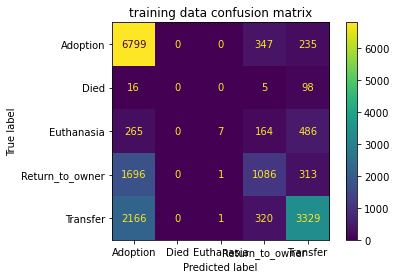

In [8]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train)
plt.title('training data confusion matrix')
plt.show()

In [9]:
#testing score
clf.score(x_test,y_test)

0.626514131897712

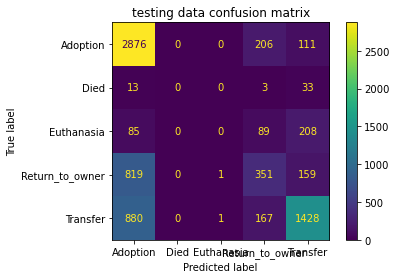

In [10]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test)
plt.title('testing data confusion matrix')
plt.show()

## random forest

In [11]:
#search a good model
tr = ensemble.RandomForestClassifier()

clf = model_selection.GridSearchCV(tr, param_grid={'max_depth':range(10,26)}, n_jobs=-1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.6412830993602029
{'max_depth': 15}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.485341,0.041359,0.218771,0.025917,10,{'max_depth': 10},0.635708,0.622729,0.630805,0.628209,0.631852,0.629861,0.004305,16
1,4.631615,0.290519,0.319164,0.118825,11,{'max_depth': 11},0.638016,0.626190,0.633401,0.634266,0.636469,0.633668,0.004077,13
2,4.853140,0.094265,0.266262,0.054147,12,{'max_depth': 12},0.639169,0.627055,0.637439,0.635420,0.636180,0.635053,0.004195,10
3,6.013556,0.191054,0.348932,0.024507,13,{'max_depth': 13},0.641477,0.632247,0.641477,0.631670,0.643104,0.637995,0.004968,4
4,6.906729,0.310507,0.309062,0.046625,14,{'max_depth': 14},0.643496,0.632535,0.639746,0.634266,0.644259,0.638860,0.004744,3
5,7.161701,0.090888,0.290757,0.057130,15,{'max_depth': 15},0.646957,0.637439,0.642631,0.636862,0.642527,0.641283,0.003739,1
6,8.159227,0.232624,0.374386,0.118999,16,{'max_depth': 16},0.644073,0.635708,0.644073,0.634554,0.641662,0.640014,0.004099,2
7,9.366714,0.142957,0.376777,0.075723,17,{'max_depth': 17},0.638304,0.635131,0.641765,0.627344,0.642527,0.637014,0.005508,6
8,9.770316,0.151245,0.376912,0.070394,18,{'max_depth': 18},0.642919,0.628497,0.633689,0.627344,0.641085,0.634707,0.006355,11
9,10.853221,0.151927,0.362891,0.052640,19,{'max_depth': 19},0.638881,0.629074,0.637439,0.627344,0.646855,0.635918,0.007086,9


In [12]:
#training score
clf.score(x_train,y_train)

0.7797969308872735

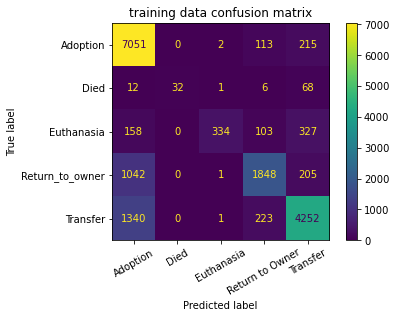

In [13]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

In [14]:
#testing score
clf.score(x_test,y_test)

0.6409152086137281

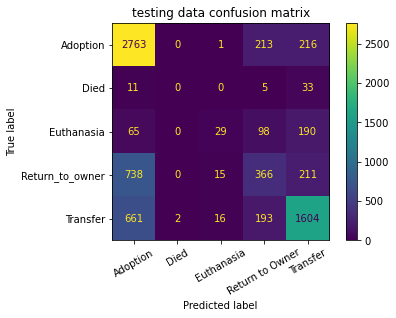

In [15]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()